In [1]:
# to print all the output of one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
from pandas import Series, DataFrame

In [3]:
df = pd.read_csv('investments_VC.csv', encoding = "ISO-8859-1")
pd.set_option("display.max.columns",None)
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.Initial Data Preparation

### 1.1 General Change

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

From the information of the dataset, we can know:
* The column name " markert" and " funding_total_usd" with blank, the blank need to be removed.
* "funding_total_usd" with dtype is obeject and with comma in the data, we need to remove comma and change the type to float.

In [5]:
# rename the two columns
# df.columns = df.columns.str.strip()
# df.columns
df.rename(columns={' market ':'market',' funding_total_usd ':'funding_total_usd'},inplace=True)

In [6]:
df["funding_total_usd"] = df["funding_total_usd"].str.replace(",",'').str.replace(' ',"")
df["funding_total_usd"] = df["funding_total_usd"].replace("-",np.nan).astype('float',errors='ignore')

In [7]:
print(df["funding_total_usd"].dtype)

float64


In [8]:
print(df.shape)
df.describe()

(54294, 39)


,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.090700e+04,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.591253e+07,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,2.074286e+06,6.088736e+05,4.434360e+05,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.686788e+08,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,3.167231e+07,2.678348e+07,3.428169e+07,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000e+00,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+05,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+06,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+07,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


### 1.2 Data Selection

Based on the statistic description, we can find the oldest companes founded on 1902. We only include the companies founded between 1985-2014, due to those firms estabilsed before 1985 are considered too old to be startups. 

In [9]:
df = df.loc[df["founded_year"]>1985]

In [10]:
print(df.shape)

(37782, 39)


### 1.3 Missing Data

Next, we will check the missing data.

In [11]:
# check nans
# df.isnull().sum()
df_na=df.isna().mean().to_frame()
df_na[df_na[0]>0].style.background_gradient(cmap='OrRd')

,0
name,0.000026
homepage_url,0.054947
category_list,0.049389
market,0.049521
funding_total_usd,0.163941
status,0.023053
country_code,0.079456
state_code,0.360542
region,0.079456
city,0.090810


Delete entities with missing market, funding_total_usd, status, country_code, region, funding_rounds, founded-yaer, first_funding_at, last_funding_at.

In [12]:
df = df.drop(df[
    (
        (df['market'].isna())|
        (df['funding_total_usd'].isna())|
        (df['status'].isna())|
        (df['country_code'].isna())|
        (df['region'].isna())
    )
].index)

In [13]:
df.isnull().sum()

permalink                  0
name                       0
homepage_url            1035
category_list              0
market                     0
funding_total_usd          0
status                     0
country_code               0
state_code              8238
region                     0
city                     315
funding_rounds             0
founded_at                 0
founded_month              0
founded_quarter            0
founded_year               0
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D       

In [14]:
print(df.shape)

(27816, 39)


### 1.4 Check for Duplicated Rows

In [15]:
# check and delete duplicate rows
print('Duplicated rows:',df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

Duplicated rows: 0
(27816, 39)


### 1.5 Data Transformation  

* Date data  

We can know that there are 3 date type column, we will change the data type and transform them as below:

firm_age = current year(2014-12-12) - founded_at  
first_funding_lag = first_funding_at - founded_at  
last_funding_lag = last_funding_at - founded_at  
first_last_lag = last_funding_at - first_funding_at  
last_funding_to_date = date when data collected untill(2014-12-12) - last_funding_at

In [16]:
#3 data variables need to be converted into a date type.
format_date = ('founded_at','first_funding_at','last_funding_at')
for i in format_date:
    df[i] = pd.to_datetime(df[i], format = '%Y-%m-%d', errors = 'coerce')
    print(df[i].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [17]:
df['first_funding_lag'] = (df['first_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['last_funding_lag'] = (df['last_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['firm_age'] = (np.datetime64('2014-12-12')-df['founded_at'])/pd.Timedelta(days=365)
df['first_last_lag'] = (df['last_funding_at']-df['first_funding_at'])/pd.Timedelta(days=365)
df['last_funding_to_date'] = (np.datetime64('2014-12-12')-df['last_funding_at'])/pd.Timedelta(days=365)

In [18]:
print(df.shape)

(27816, 44)


* Category column

Due to the market column has 695 unique market category, which is difficult to group them manually, hence we can group the market category according to category_list.

In [19]:
df['market'].value_counts()

 Software                   3047
 Biotechnology              2225
 Mobile                     1260
 E-Commerce                 1014
 Curated Web                 968
                            ... 
 Gift Registries               1
 Data Center Automation        1
 Insurance Companies           1
 Music Venues                  1
 Virtual Goods                 1
Name: market, Length: 695, dtype: int64

The category list column contains many key words represent the category or market the startup operats in. Firstly, we define a function to find the most frequent key words and their frequency. Then we create a dictionary to replace the multiple categories with one key word and form a new column named category.  

In [20]:
def frequency_count(data,col,n):
    # get the target list
    data_list = data[col]
    
    # Concatenate all the strings in Series with | separator
    list_str = data_list.str.cat(sep='|')
    
    # Split strings with given separator
    list_split = list_str.split('|')
    
    # Remove space
    list_split_all = [x.strip() for x in list_split]
    
    # Create a contanier in form of dictionary
    count = Counter(list_split_all) 
    
    # Create a list with unique words
    unique_list = list(count.keys())
    print('--------------------There are {} unique key words in column {}--------------------'.format(len(unique_list),col))
    
    # Return a list of the n most common elements and their counts with descending order
    most_frequency = count.most_common(n)
    # Build a DataFrame
    data_frequency = pd.DataFrame(most_frequency, columns=['key_word','count'])
    print(data_frequency)

In [21]:
frequency_count(data=df,col='category_list',n=50)

--------------------There are 792 unique key words in column category_list--------------------
                key_word  count
0                         55626
1               Software   4724
2                 Mobile   3019
3          Biotechnology   2456
4             E-Commerce   2010
5            Curated Web   1863
6           Social Media   1664
7    Enterprise Software   1635
8            Advertising   1516
9                  Games   1210
10             Analytics   1029
11           Health Care    964
12               Finance    955
13                  SaaS    916
14   Hardware + Software    907
15   Health and Wellness    857
16             Education    841
17      Clean Technology    769
18              Internet    629
19                  Apps    597
20              Security    595
21                 Video    565
22       Cloud Computing    523
23                Search    502
24            Technology    462
25            Networking    461
26                Travel    455
27       

GICS https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard 

In [22]:
# create a dictionary according to the frequency table to include as many words as possible in the dictionary
category_dict={'Consumer Services':'Education|Human Resources|Printing||Tourism|Travel|Office Services & Supplies|Security|Design',
               'Biotechnology':'Biotechnology',
               'Internet & Direct Marketing Retail': 'E-Commerce|Sales|Marketing|Retail',
               'Interactive Media & Services':'Social Media|Networking|Social Network Media|Messaging',
               'Media':'Advertising|News|Media',
               'Entertainment':'Games|Video|Music|Entertainment|Photography',
               'Health Care':'Health Care|Health and Wellness|Hospitality|Sports|Medical',
               'Finance':'Finance',
               'Technology Hardware':'Hardware + Software|Clean Technology|Cloud Computing|Technology|Big Data',
               'Software':'Software',
               'IT Services':'Curated Web|Internet|IT|Search|Web Hosting|Web Development|Apps',
               'Semiconductors':'Semiconductors',
               'Professional Services':'Consulting',
               'Real Estate Management & Development':'Real Estate',
               'Oil, Gas & Consumable Fuels':'Oil|Gas|Fuels',
               'Specialty Retail':'Mobile|Automotive|Android|iPhone|Fashion',
               'Transportation':'Public Transportation|Transportation'}

In [23]:
df['category']=np.nan

for i, j in category_dict.items():
    df.loc[df['category_list'].str.contains(j),'category'] = i

In [24]:
df.category.value_counts()
df.category.isnull().sum()

Software                                5883
Specialty Retail                        4059
IT Services                             3472
Consumer Services                       2766
Biotechnology                           2232
Health Care                             1929
Media                                   1584
Entertainment                           1379
Technology Hardware                     1293
Internet & Direct Marketing Retail      1176
Finance                                  590
Semiconductors                           362
Professional Services                    324
Real Estate Management & Development     309
Transportation                           221
Interactive Media & Services             207
Oil, Gas & Consumable Fuels               30
Name: category, dtype: int64

0

In [25]:
print(df.shape)

(27816, 45)


### 1.6 Target Variable

**Note:Consider more proper way to define success: operating status remain 10 years and doesn't require more funding (or funding round less than threshold)**  
Because in reality many small and medium firms, startups rarely went to ipo, but they are still doing business and earn stable profit, these firms can also be considered as successful.

In [26]:
df.status.value_counts()

operating    23913
acquired      2454
closed        1449
Name: status, dtype: int64

According to literature review and the recommendation from Mara, we difine a successiful startup if it:  
1) with acquired status **or**  
2) went to public(issue ipo) **or**  
3) with operating status *and* achieve series B funding **or**  
4) with operating status *and* not require fund within at least 8 years after its last funding date.

In [27]:
df['Target'] = np.where(
    (df['status'] =='acquired')|
    (df['post_ipo_equity']!=0)|
    (df['post_ipo_debt']!=0)|
    ((df['status'] =='operating') & (df['round_B']!=0))|
    ((df['status'] =='operating') & (df['last_funding_lag']!=df['first_funding_lag'])& (df['last_funding_to_date']>8)),1,0)

In [28]:
df['Target'].value_counts()

0    21689
1     6127
Name: Target, dtype: int64

In [29]:
number = {'The no. of operating firms and have no request fund within years':[len(df.loc[(df['status'] =='operating') & (df['last_funding_to_date']>5)]),
                                                                              len(df.loc[(df['status'] =='operating') & (df['last_funding_to_date']>8)]),
                                                                              len(df.loc[(df['status'] =='operating') & (df['last_funding_to_date']>10)])]
         }
DataFrame(number,index=['5 years','8 years','10 years'])

,The no. of operating firms and have no request fund within years
5 years,2982
8 years,738
10 years,128


In [30]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,first_funding_lag,last_funding_lag,firm_age,first_last_lag,last_funding_to_date,category,Target
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079452,0.079452,2.531507,0.000000,2.452055,Entertainment,1
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213699,-0.213699,2.128767,0.000000,2.342466,Consumer Services,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.701370,0.000000,3.701370,Specialty Retail,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247,0.945205,0.109589,0.210959,Entertainment,0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,40000.0,operating,CHL,NaN,Santiago,Las Condes,1.0,2012-01-01,2012-01,2012-Q1,2012.0,2013-02-18,2013-02-18,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.134247,1.134247,2.947945,0.000000,1.813699,Internet & Direct Marketing Retail,0


In [31]:
print(df.shape)

(27816, 46)


## 2.Data vis

In [32]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('darkgrid') # darkgrid;whitegrid;dark;white;ticks
from collections import Counter 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

### 2.1 Generel Distribution  
* Market  
* Country  
* Funding_round  
* Firm_age  
* Target

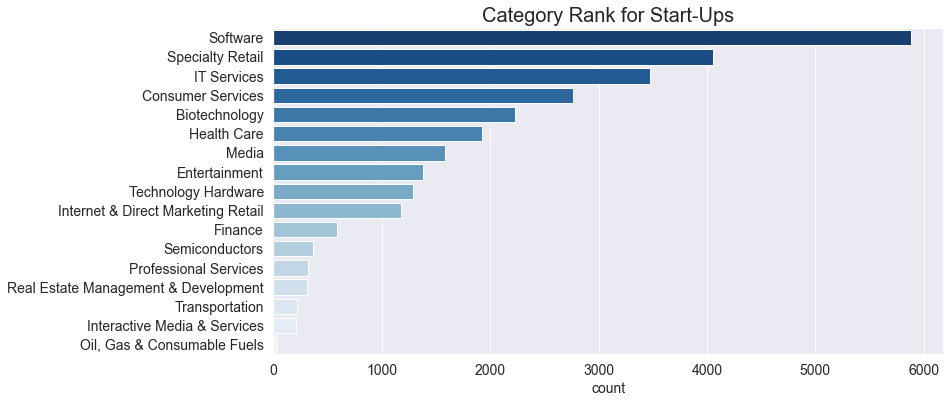

In [33]:
# df['category'].value_counts().head(10).plot(kind='bar',alpha=0.9)
category=df['category'].value_counts()
category=category.to_frame()

sns.barplot(y=category.index,
            x=category['category'],
            orient='h',
            palette='Blues_r').set_title("Category Rank for Start-Ups",fontsize=20)
plt.xlabel('count');

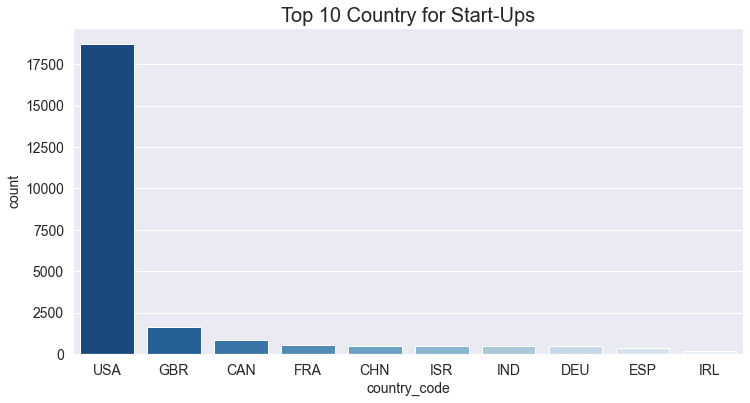

In [34]:
country=df['country_code'].value_counts()
country=country[0:10].to_frame()
sns.barplot(y=country['country_code'],
            x=country.index,
            palette='Blues_r').set_title("Top 10 Country for Start-Ups",fontsize=20)
plt.ylabel('count') #fontsize;color;fontweight;horizontalalignment(center)
plt.xlabel('country_code');

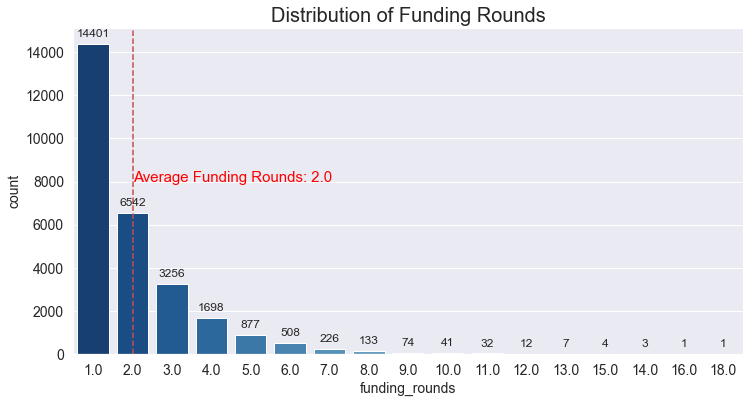

In [35]:
fig = plt.subplots()
ax = sns.countplot(x=df['funding_rounds'],order= df['funding_rounds'].value_counts()[:].index,palette='Blues_r' )
ax.set_title('Distribution of Funding Rounds',fontsize=20)
plt.ylabel(' ');

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#add a vertical line for the mean value of funding rounds
ax.axvline(x=round(df['funding_rounds'].mean(),0)-1, label='line at x = {}'.format(round(df['funding_rounds'].mean(),0)-1),color='r',linestyle='dashed')

style = dict(size=15, color='red')
ax.text(1.0, 8000, "Average Funding Rounds: 2.0", **style)
plt.ylabel('count');

# funding_rounds=df.funding_rounds.value_counts().to_frame()
# sns.barplot(y=funding_rounds['funding_rounds'],
#             x=funding_rounds.index,
#             palette='Blues_r').set_title('Distribution of Funding Rounds',fontsize=20)
# plt.ylabel(' ')
# plt.xlabel('funding_rounds');

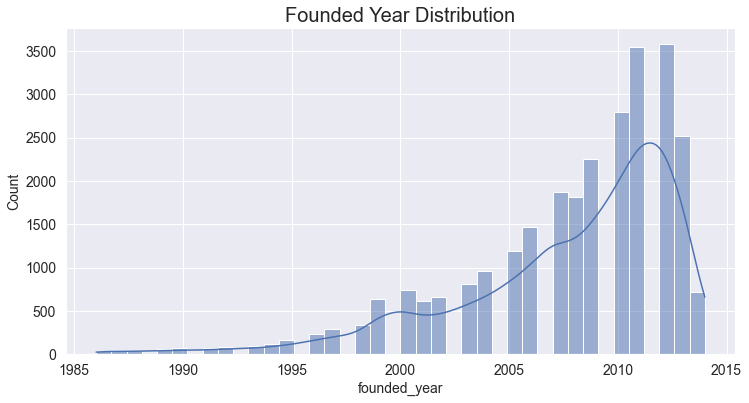

In [36]:
sns.histplot(df['founded_year'], kde=True, bins=40).set_title('Founded Year Distribution',fontsize=20);

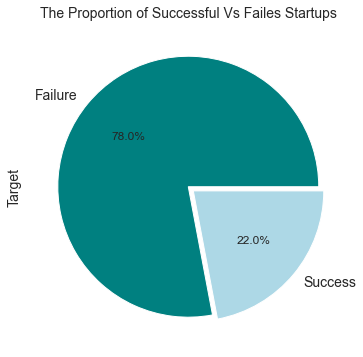

In [37]:
target = df['Target'].value_counts()
labels = 'Failure','Success'

#pie chart plot
target.plot.pie(autopct = '%1.1f%%',colors=['Teal', 'lightblue'],explode= [0,0.05], labels = labels)
plt.title("The Proportion of Successful Vs Failes Startups",fontsize=14)
plt.show();

In [38]:
target

0    21689
1     6127
Name: Target, dtype: int64

### 2.2 Relationship among Variables  
* Success and date   
* Is there preference of funding refer to any market,country,region? (done)  
* The success rate with respect to market,country,region (done)  
* The success rate with respect to UK region, and preference of funding refer to UK region (done)  
* Relationship between success and the funding type (done)   
* Which type of funding get the highest fund? (done)  
* Visualize the performance before and after 1994 (done)

### 2.2.1 Success and Date

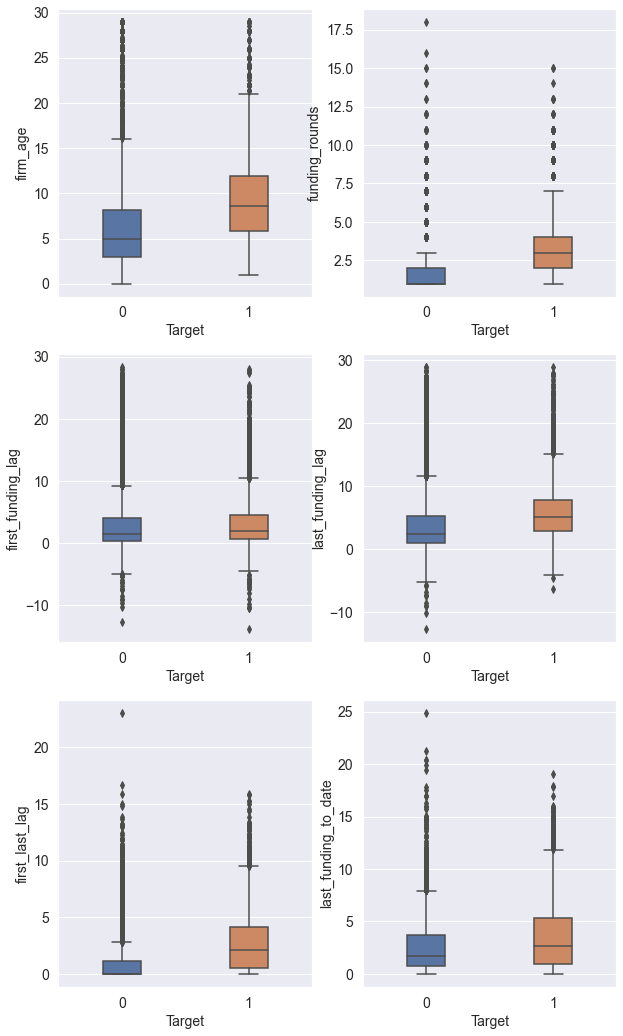

In [39]:
plt.figure(constrained_layout=False,figsize=(10,18))

plt.subplot(3,2,1)
sns.boxplot( x=df["Target"], y=df["firm_age"],width=0.3)

plt.subplot(3,2,2)
sns.boxplot( x=df["Target"], y=df["funding_rounds"],width=0.3)

plt.subplot(3,2,3)
sns.boxplot( x=df["Target"], y=df["first_funding_lag"],width=0.3)

plt.subplot(3,2,4)
sns.boxplot( x=df["Target"], y=df["last_funding_lag"],width=0.3)

plt.subplot(3,2,5)
sns.boxplot( x=df["Target"], y=df["first_last_lag"],width=0.3)

plt.subplot(3,2,6)
sns.boxplot( x=df["Target"], y=df["last_funding_to_date"],width=0.3);

### 2.2.2 Total Funding Amount and Countries, Market

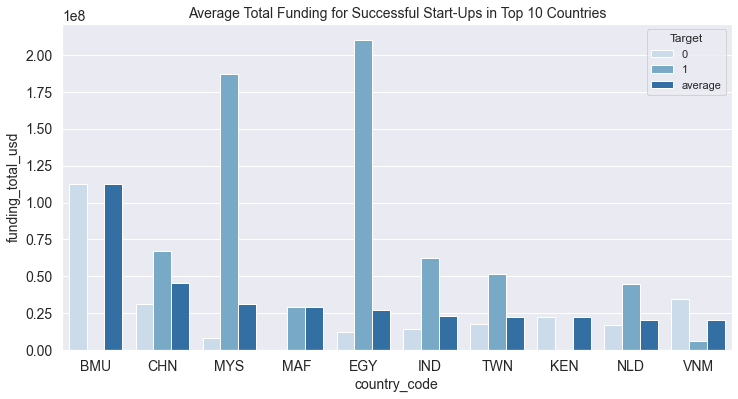

In [40]:
table1=pd.pivot_table(df, index=['country_code'], values=['funding_total_usd'],columns=['Target'],fill_value=0, margins=True)
table1.rename(columns={'All':'average'},inplace=True)

tb1=table1.sort_values(by=('funding_total_usd','average'),ascending=False).head(10).unstack().reset_index()
tb1.rename(columns={0:'funding_total_usd'},inplace=True)

sns.barplot(x='country_code',y='funding_total_usd',
            hue="Target",data=tb1, palette='Blues').set_title("Average Total Funding for Successful Start-Ups in Top 10 Countries",fontsize=14,weight=400);

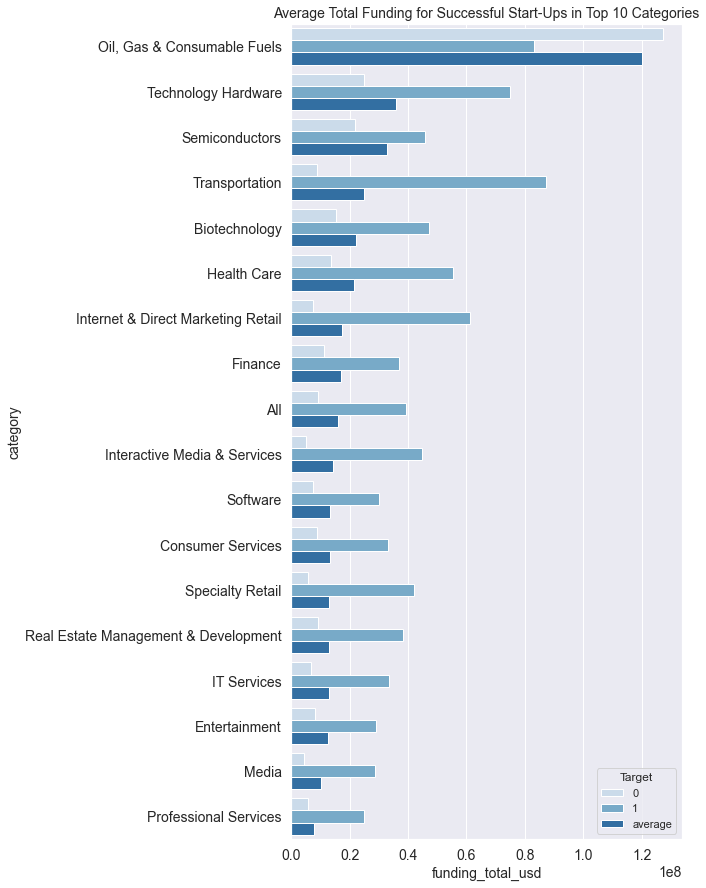

In [41]:
table2=pd.pivot_table(df, index=['category'], values=['funding_total_usd'],columns=['Target'], fill_value=0, margins=True)
table2.rename(columns={'All':'average'},inplace=True)

tb2=table2.sort_values(by=('funding_total_usd','average'),ascending=False).head(20).unstack().reset_index()
tb2.rename(columns={0:'funding_total_usd'},inplace=True)

plt.figure(figsize=(7,15))
sns.barplot(y='category',x='funding_total_usd',hue="Target", orient='h',
            data=tb2, palette='Blues').set_title("Average Total Funding for Successful Start-Ups in Top 10 Categories",
              fontsize=14,weight=400);

### 2.2.3 Success Count,Rate and Country,Market

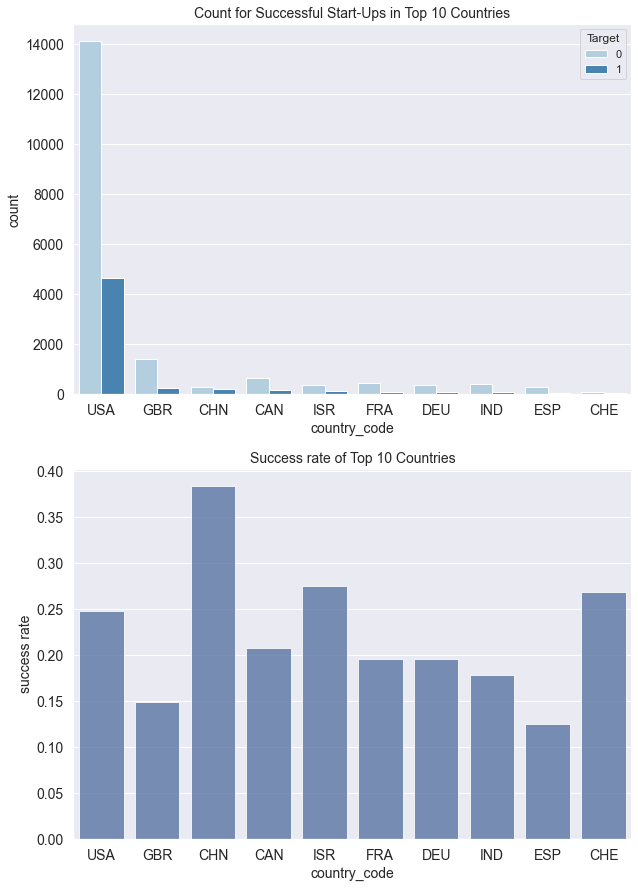

In [42]:
table3=pd.pivot_table(df, index=['country_code'], values=['name'],columns=['Target'],
                     aggfunc=[len], fill_value=0)

table3['success rate'] = table3[('len','name',1)]/(table3[('len','name',1)]+table3[('len','name',0)])

tb3=table3.sort_values(by=('len','name',1),ascending=False).head(10).unstack().reset_index()
tb3.rename(columns={0:'count'},inplace=True)

plt.figure(constrained_layout=False,figsize=(10,15))
plt.subplot(2,1,1)
sns.barplot(x='country_code',y='count',hue="Target", 
            data=tb3.loc[(tb3['level_0']=='len')], palette='Blues').set_title("Count for Successful Start-Ups in Top 10 Countries",
              fontsize=14,weight=400);

plt.subplot(2,1,2)
sns.barplot(x='country_code',y='count', 
            data=tb3.loc[(tb3['level_0']=='success rate')],color='b',alpha=0.8).set_title("Success rate of Top 10 Countries",
              fontsize=14,weight=400)
plt.ylabel('success rate');

# Top 10 countries, ordered by the no.of successful firms in coutries

In [43]:
#tb1

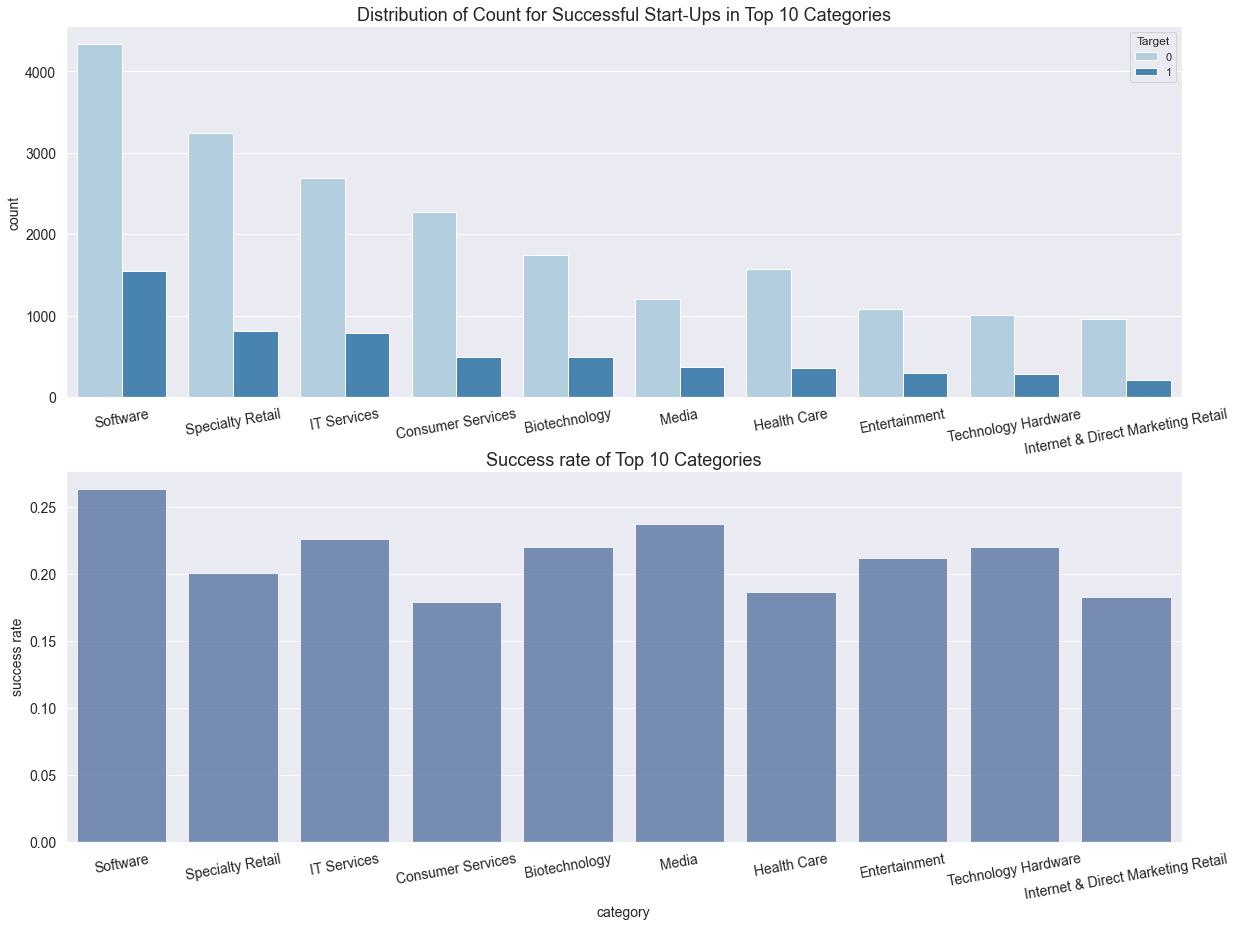

In [44]:
table4=pd.pivot_table(df, index=['category'], values=['name'],columns=['Target'],
                     aggfunc=[len], fill_value=0)

table4['success rate'] = table4[('len','name',1)]/(table4[('len','name',1)]+table4[('len','name',0)])

tb4=table4.sort_values(by=('len','name',1),ascending=False).head(10).unstack().reset_index()
tb4.rename(columns={0:'count'},inplace=True)

plt.figure(constrained_layout=False,figsize=(20,15))
plt.subplot(2,1,1)
sns.barplot(x='category',y='count',hue="Target", 
            data=tb4.loc[(tb4['level_0']=='len')], palette='Blues').set_title("Distribution of Count for Successful Start-Ups in Top 10 Categories",
              fontsize=18)
plt.xticks(rotation=10)
plt.xlabel(' ');

plt.subplot(2,1,2)
sns.barplot(x='category',y='count', 
            data=tb4.loc[(tb4['level_0']=='success rate')],color='b',alpha=0.8).set_title("Success rate of Top 10 Categories",
              fontsize=18) 
plt.ylabel('success rate')
plt.xticks(rotation=10);

### 2.2.4 Success count,rate of UK Region 

In [45]:
table5=pd.pivot_table(df.loc[(df['country_code']=='GBR')], index=['region'], values=['name'],columns=['Target'],
                     aggfunc=[len], fill_value=0)

table5['success rate'] = table5[('len','name',1)]/(table5[('len','name',1)]+table5[('len','name',0)])

tb5=table5.sort_values(by=('len','name',1),ascending=False).head(10).unstack().reset_index()
tb5.rename(columns={0:'count'},inplace=True)

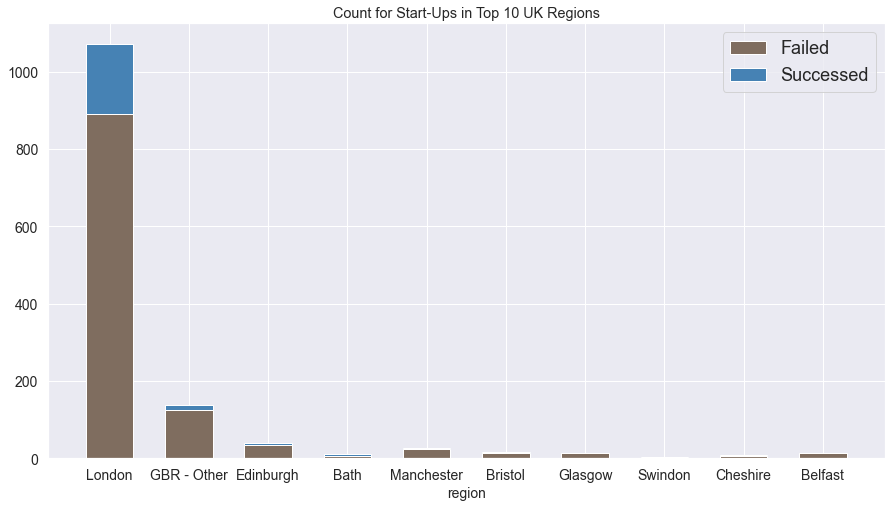

In [46]:
plt.figure(constrained_layout=False,figsize=(15,8))
# Values of each group
bars1 = tb5.loc[tb5['Target'] == 0]['count']
bars2 = tb5.loc[tb5['Target'] == 1]['count']

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = list(range(0,10))

# Names of group and bar width
names = list(tb5['region'][0:10])
barWidth = 0.6

# Create bottom brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth, label='Failed')
# Create top green bars, on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#4682B4', edgecolor='white', width=barWidth, label='Successed')

# Title
plt.title('Count for Start-Ups in Top 10 UK Regions',fontsize='large')

# Custom X axis
plt.xticks(r, names) # fontweight='bold'
plt.xlabel("region")

# Create legend
plt.legend(prop={'size':18})

# Show graphic
plt.show();

In [47]:
# tb5

### 2.2.5 Total Funding Amount and UK Region

In [48]:
table6=pd.pivot_table(df.loc[df['country_code']=='GBR'],
                      index=['region'], values=['funding_total_usd'],columns=['Target'],fill_value=0)

tb6=table6.sort_values(by=('funding_total_usd',1),ascending=False).head(10).unstack().reset_index()
tb6.rename(columns={0:'funding_total_usd'},inplace=True)

In [49]:
# tb6

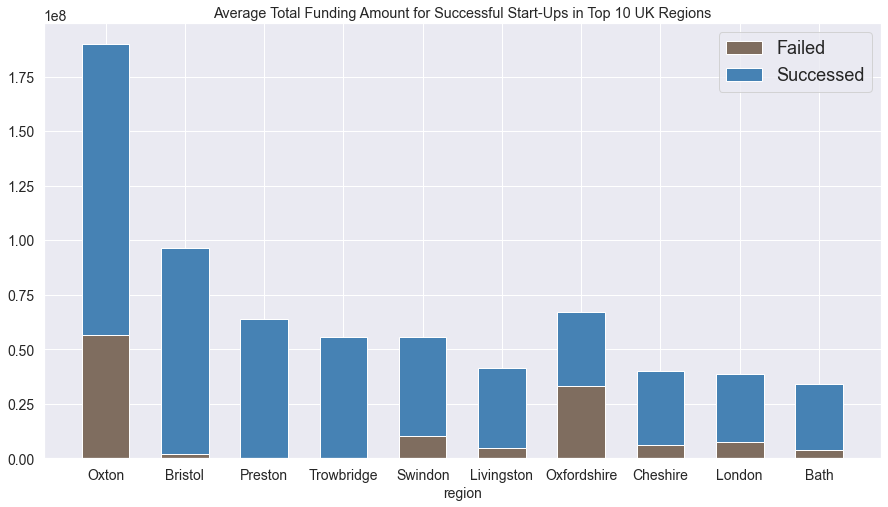

In [50]:
plt.figure(figsize=(15,8))

bars1 = tb6.loc[tb6['Target'] == 0]['funding_total_usd']
bars2 = tb6.loc[tb6['Target'] == 1]['funding_total_usd']

bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = list(range(0,10))

# Names of group and bar width
names = list(tb6['region'][0:10])
barWidth = 0.6

# Create bottom brown bars and top blue bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth, label='Failed')
plt.bar(r, bars2, bottom=bars1, color='#4682B4', edgecolor='white', width=barWidth, label='Successed')

# Custom X axis and set title
plt.xticks(r, names)
plt.xlabel("region")
plt.title('Average Total Funding Amount for Successful Start-Ups in Top 10 UK Regions',fontsize='large')
        
plt.legend(prop={'size':18})
plt.show();

### 2.2.6 Success and Funding Type

In [51]:
# df.columns

In [52]:
fund_columns = ['seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H','funding_total_usd','Target']
fund_df = df[fund_columns]

fund_df.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,Target
0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,1
2,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0
3,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0
4,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,0
10,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0


<AxesSubplot:>

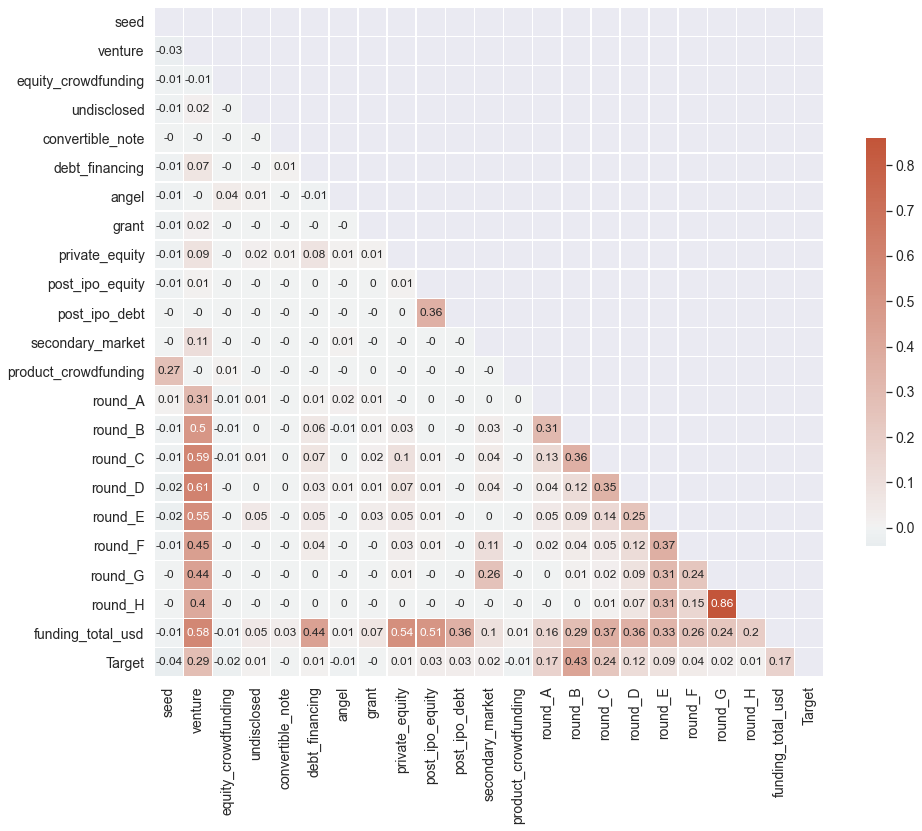

In [53]:
# draw the heatmap between all variables
corr = round(fund_df.corr(),2)
mask = np.triu(np.ones_like(corr, dtype=bool)) #generate a mask for top right
cmap = sns.diverging_palette(220,20, as_cmap=True)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, 
            mask=mask, 
            cmap = cmap ,
            annot=True,
            center=0,
            linewidths=.5,
            square=True,  
            cbar_kws={"shrink": 0.5})

### 2.2.7 Funding Type

In [54]:
stat_df = fund_df.describe()
mean_df = stat_df.iloc[stat_df.index=='mean'].T.sort_values(by='mean')
# mean_df['mean'][1:-1]
# mean_df.index[1:-1]

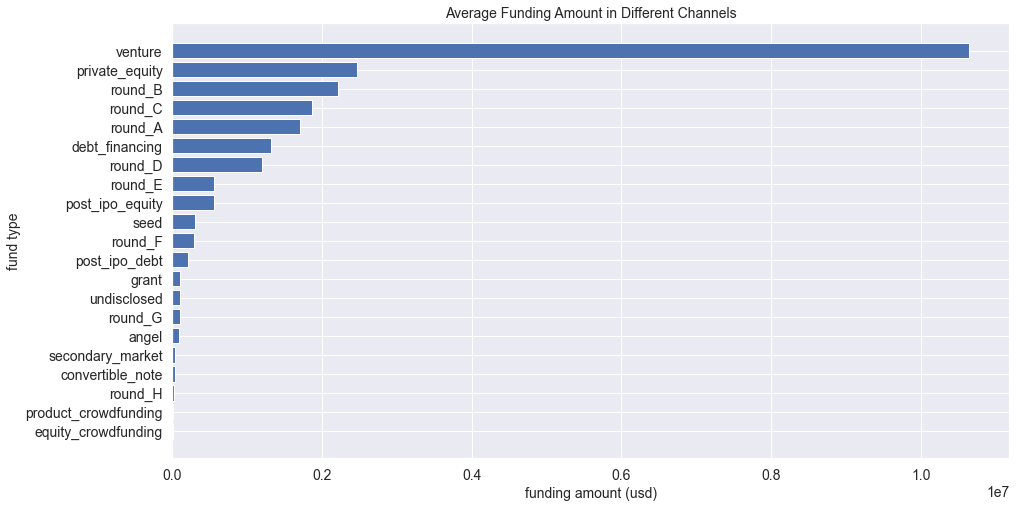

In [55]:
plt.figure(figsize=(15,8))
height = mean_df['mean'][1:-1]
bars = mean_df.index[1:-1]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)

plt.xlabel('funding amount (usd)')
plt.ylabel('fund type')
plt.title('Average Funding Amount in Different Channels',fontsize=14)

# Show graphic
plt.show();

## 3.Final preparation for modelling

### 3.1 Drop useless columns

* The permalink and homepage_link are useless for analysis,and some geographical data(name,state_code,city) are needless, which will be dropped.
* Drop date data
* Drop category and market

In [56]:
# drop the link and ucl which are useless
df = df.drop(['name','permalink', 'homepage_url','status','founded_month','founded_quarter','founded_year','state_code','region','city','category_list','market','founded_at','first_funding_at','last_funding_at'], axis=1) 
print(df.shape)
df.head()

(27816, 31)


,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,first_funding_lag,last_funding_lag,firm_age,first_last_lag,last_funding_to_date,category,Target
0,1750000.0,USA,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079452,0.079452,2.531507,0.000000,2.452055,Entertainment,1
2,40000.0,EST,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213699,-0.213699,2.128767,0.000000,2.342466,Consumer Services,0
3,1500000.0,GBR,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.701370,0.000000,3.701370,Specialty Retail,0
4,60000.0,USA,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247,0.945205,0.109589,0.210959,Entertainment,0
10,40000.0,CHL,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.134247,1.134247,2.947945,0.000000,1.813699,Internet & Direct Marketing Retail,0


### 3.2 Handling Outliers 

In [57]:
# Calculate IQR
Q3 = df['funding_total_usd'].quantile(0.75) # upper quartile = 0.75 quantile
Q1 = df['funding_total_usd'].quantile(0.25) # lower quartile = 0.25 quamtile
IQR = Q3 - Q1 #"Interquartile range" = upper quartile - lower quatile= Q3 - Q1
Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q1 - 1.5*IQR
/
print("The interquartile range is from", Lower_limit , "to" , Upper_limit)

()

The interquartile range is from -14981907.375 to 26129845.625


In [58]:
df['funding_total_usd'] = np.where(df['funding_total_usd'] > Upper_limit, Upper_limit, 
                                 np.where(df['funding_total_usd'] < Lower_limit, Lower_limit, df['funding_total_usd']))
# df = df[(df['funding_total_usd']>=Lower_limit &
#     df['funding_total_usd']<=Upper_limit)]
# ]

In [59]:
print(df.shape)

(27816, 31)


### 3.3 Correlation matrix

<Figure size 2160x2160 with 0 Axes>

(29.0, 0.0)

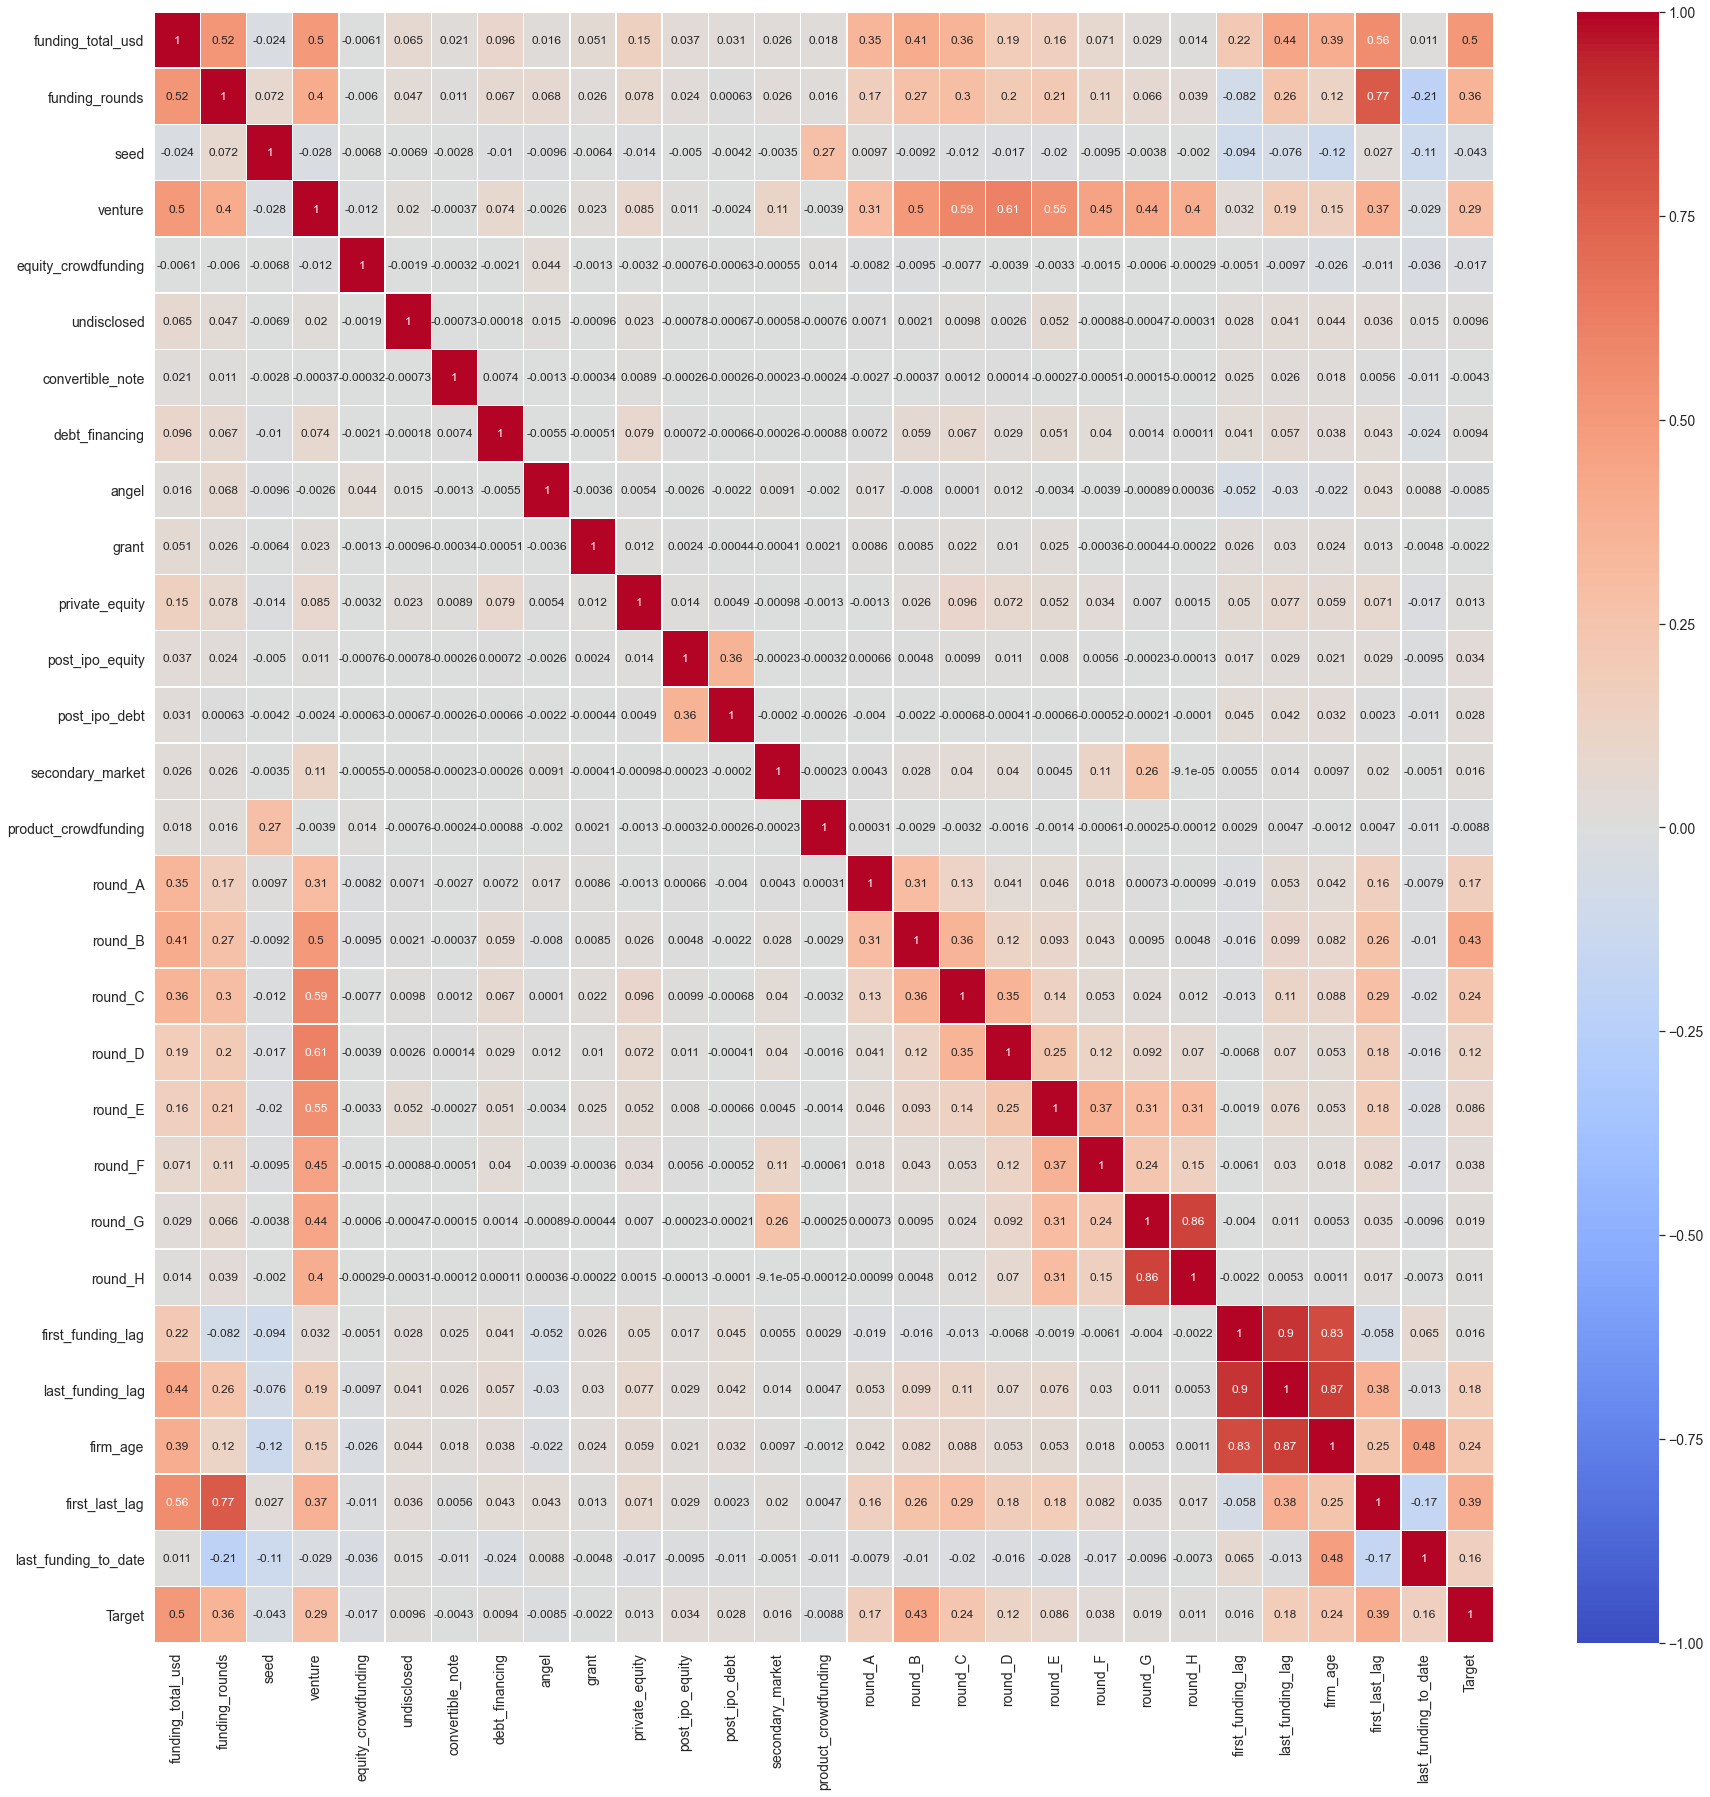

In [60]:
plt.figure(figsize=(30,30))
startup_heat = df.corr()

startup_heat= sns.heatmap(startup_heat, annot=True,linewidth = 0.5, cmap='coolwarm', vmin=-1, vmax=1)

bottom, top = startup_heat.get_ylim()
startup_heat.set_ylim(bottom, top)

plt.show()

We can see the there are relatively high correlation between firm age and fist,last funding lag, so we drop firm age; and round_G,round H; and same in funding round and first_last_lag, so we drop first_last_lag.

<Figure size 2160x2160 with 0 Axes>

(24.0, 0.0)

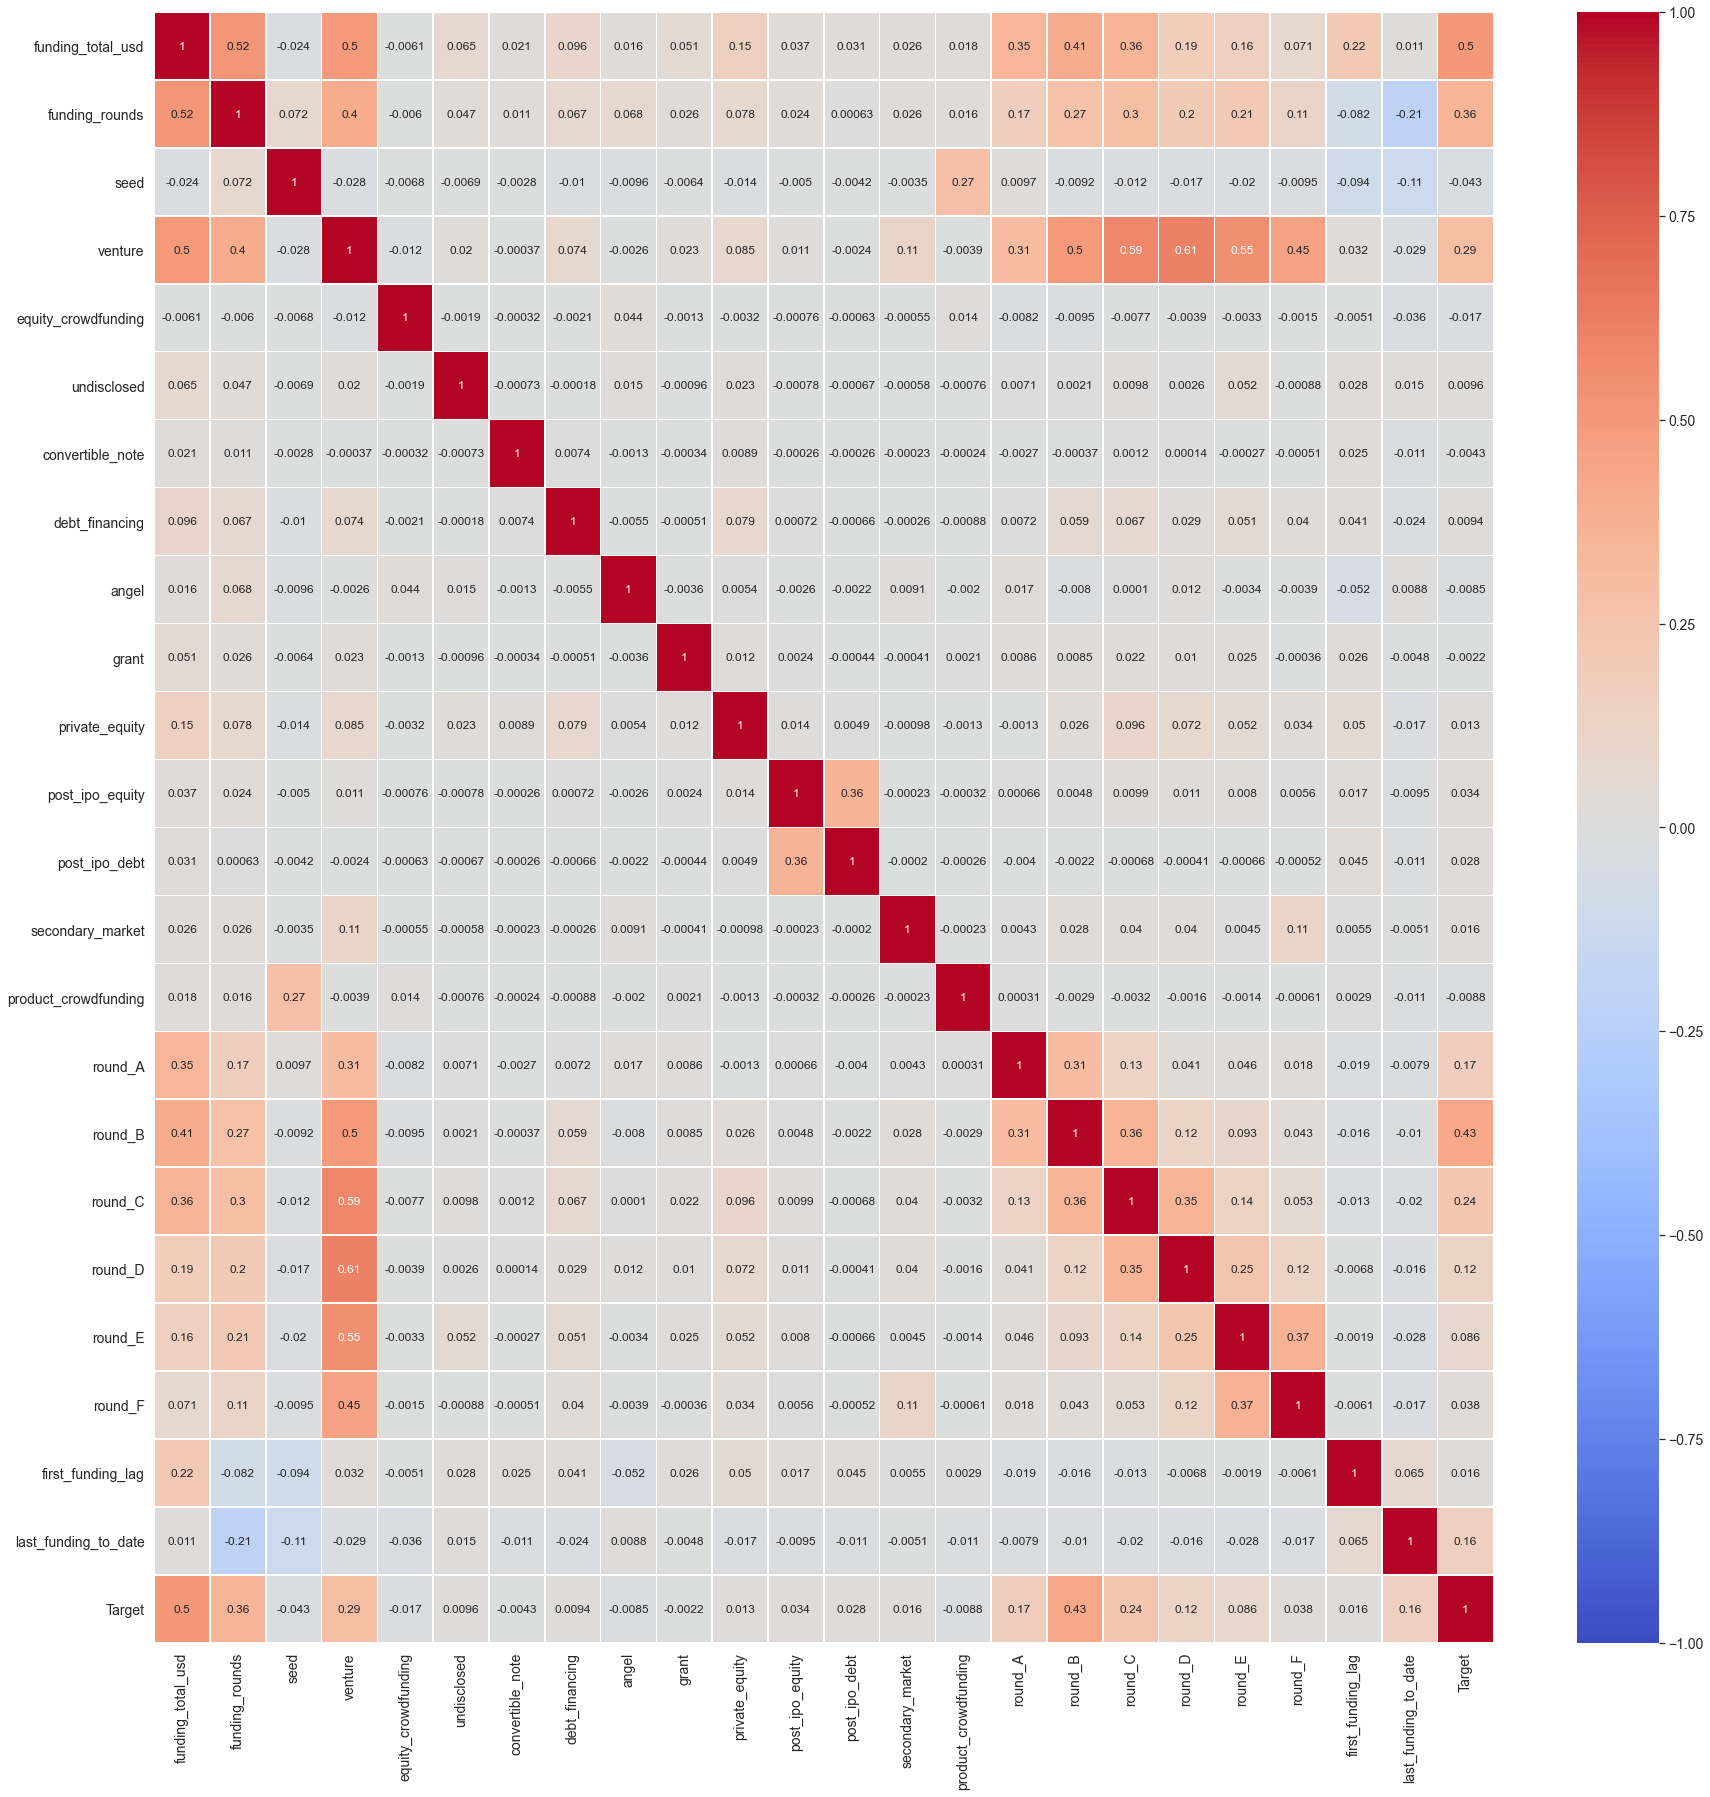

In [61]:
df = df.drop(
    [
     'round_G',
     'round_H',
     'last_funding_lag',
     'firm_age',
     'first_last_lag'
     ], axis = 1)

plt.figure(figsize=(30,30))
startup_heat = df.corr()

startup_heat= sns.heatmap(startup_heat, annot=True,linewidth = 0.5, cmap='coolwarm', vmin=-1, vmax=1)

bottom, top = startup_heat.get_ylim()
startup_heat.set_ylim(bottom, top)

plt.show()

In [62]:
print(df.shape)

(27816, 26)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27816 entries, 0 to 49437
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funding_total_usd     27816 non-null  float64
 1   country_code          27816 non-null  object 
 2   funding_rounds        27816 non-null  float64
 3   seed                  27816 non-null  float64
 4   venture               27816 non-null  float64
 5   equity_crowdfunding   27816 non-null  float64
 6   undisclosed           27816 non-null  float64
 7   convertible_note      27816 non-null  float64
 8   debt_financing        27816 non-null  float64
 9   angel                 27816 non-null  float64
 10  grant                 27816 non-null  float64
 11  private_equity        27816 non-null  float64
 12  post_ipo_equity       27816 non-null  float64
 13  post_ipo_debt         27816 non-null  float64
 14  secondary_market      27816 non-null  float64
 15  product_crowdfundin

In [64]:
df.loc[(df.isnull().values)]

,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,first_funding_lag,last_funding_to_date,category,Target
29695,16300000.0,BRA,2.0,2000000.0,14300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14300000.0,0.0,0.0,0.0,0.0,0.0,NaN,0.213699,IT Services,0
37313,18000000.0,USA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.386301,Specialty Retail,1


In [65]:
df = df.drop(df[
    (
        (df['first_funding_lag'].isna())
    )
].index)

In [66]:
print(df.shape)

(27814, 26)


### 3.4 Handling Caregorical variables

In [67]:
# use one-hot encoding 
cat_tobe_encode = ['country_code', 'category']

for i in cat_tobe_encode:
    one_hot = pd.get_dummies(df[i], prefix=i)
    df = pd.concat([df, one_hot], axis=1) #merge the new dummies with the train set
    df = df.drop(i, axis=1) #delete the original variables that are applied one-hot coding

In [68]:
print(df.shape)

(27814, 147)


### 3.5 Feature Selection

In [69]:
from sklearn.feature_selection import chi2

In [70]:
# select all the categorical features
cate = list(df.columns[23:])

# split them into X and y to select features via chi-square test
X_fs = df[cate].drop('Target',axis=1)
y_fs = df[cate]['Target']

# calculate chi-square scores and corresponding p-value
chi_scores = chi2(X_fs,y_fs)

# create a dataframe to show the features and p-values
p_values = pd.DataFrame({'feature': X_fs.columns,'p_value':chi_scores[1]})

# pick all features that fial the chi-square test at 5% significant level
irrelevant_feature = list(p_values[p_values['p_value']>0.05].feature)

In [71]:
df = df.drop(columns=irrelevant_feature)

In [72]:
print(df.shape)

(27814, 65)


### 3.5 Scaling

There are different methods can handle with data need to be scaled, they are Standard Scaler, MaxAbs Scaler, MinMax Scaler and Robust Scaler.

I use Standard Scaler to scale numerical variables, because it is less affected by outliers, and returns a standardized distribution with mean equal to 0 and standard deviation is 1.

In [73]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
number = ['seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F',
       'funding_total_usd','funding_rounds','first_funding_lag','last_funding_to_date']
df[number] = scale.fit_transform(df[number])

In [74]:
# test=df.corr()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27814 entries, 0 to 49437
Data columns (total 65 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   funding_total_usd                              27814 non-null  float64
 1   funding_rounds                                 27814 non-null  float64
 2   seed                                           27814 non-null  float64
 3   venture                                        27814 non-null  float64
 4   equity_crowdfunding                            27814 non-null  float64
 5   undisclosed                                    27814 non-null  float64
 6   convertible_note                               27814 non-null  float64
 7   debt_financing                                 27814 non-null  float64
 8   angel                                          27814 non-null  float64
 9   grant                                          278

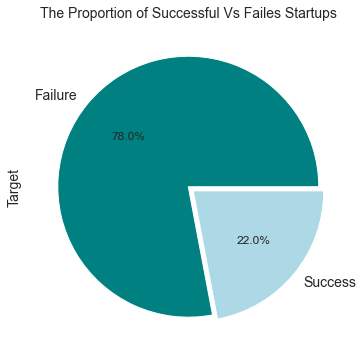

In [76]:
target = df['Target'].value_counts()
labels = 'Failure','Success'

#pie chart plot
target.plot.pie(autopct = '%1.1f%%',colors=['Teal', 'lightblue'],explode= [0,0.05], labels = labels)
plt.title("The Proportion of Successful Vs Failes Startups",fontsize=14)
plt.show();

### 3.6 Split dataset to Training and Test Set

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=7)

X_train = df_train.drop("Target",axis=1)
y_train = df_train["Target"]

X_test = df_test.drop("Target",axis=1)
y_test = df_test["Target"]

print(X_train.shape,X_test.shape)

(20860, 64) (6954, 64)


In [79]:
# X = pd.get_dummies(df.drop(['Target'],axis = 1))
# y = df['Target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
# print(X_train.shape,X_test.shape)

### 3.7 Imbalance Target

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
smote = SMOTE(random_state= 7)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [82]:
print(X_train.shape,X_test.shape)

(32526, 64) (6954, 64)


## 4.Modelling

In [83]:
# call evaluation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

In [84]:
# define a function to calculate specificity
def specificity(conf_matrix):
    return conf_matrix[0][0]/float(conf_matrix[0][0]+conf_matrix[0][1])    

**Decision Tree**

In [85]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
# cv score of train set
dt_mean_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

# predict test set
dt_y_pred = dt_clf.predict(X_test)

# confusion matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_cm

# accuracy for test set
dt_acc = accuracy_score(y_test,dt_y_pred)

# recall,specificity and f1 score
dt_recall = recall_score(y_test,dt_y_pred)
dt_spec = specificity(dt_cm)
dt_f1 = f1_score(y_test,dt_y_pred)

# roc-auc 
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_y_pred)
dt_auc = auc(dt_fpr, dt_tpr)

array([[4918,  507],
       [ 299, 1230]], dtype=int64)

<Figure size 504x360 with 0 Axes>

<AxesSubplot:>

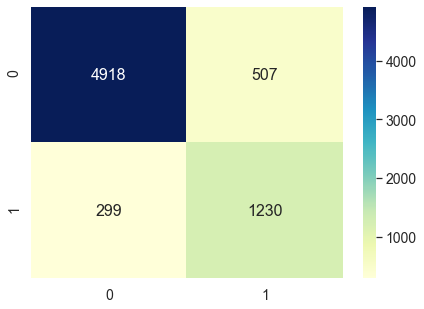

In [87]:
dt_cm = pd.DataFrame(dt_cm, index=[i for i in '01'], columns=[i for i in '01'])
plt.figure(figsize = (7,5))
sns.heatmap(dt_cm,annot=True, annot_kws={"size": 16},cmap="YlGnBu",fmt='g')

**Random Forest**

In [88]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [90]:
#Testing the impact of increasing desicion trees used to predict y.
n = 10
while n <= 200:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    print('{} - train score: {:.3f} | test score: {:.3f}'.format(n,model.score(X_train,y_train),model.score(X_test,y_test)))
    n = n+10

RandomForestClassifier(n_estimators=10)

10 - train score: 0.995 | test score: 0.924


RandomForestClassifier(n_estimators=20)

20 - train score: 0.999 | test score: 0.928


RandomForestClassifier(n_estimators=30)

30 - train score: 0.999 | test score: 0.927


RandomForestClassifier(n_estimators=40)

40 - train score: 1.000 | test score: 0.926


RandomForestClassifier(n_estimators=50)

50 - train score: 1.000 | test score: 0.929


RandomForestClassifier(n_estimators=60)

60 - train score: 1.000 | test score: 0.926


RandomForestClassifier(n_estimators=70)

70 - train score: 1.000 | test score: 0.927


RandomForestClassifier(n_estimators=80)

80 - train score: 1.000 | test score: 0.931


RandomForestClassifier(n_estimators=90)

90 - train score: 1.000 | test score: 0.929


RandomForestClassifier()

100 - train score: 1.000 | test score: 0.928


RandomForestClassifier(n_estimators=110)

110 - train score: 1.000 | test score: 0.929


RandomForestClassifier(n_estimators=120)

120 - train score: 1.000 | test score: 0.928


RandomForestClassifier(n_estimators=130)

130 - train score: 1.000 | test score: 0.929


RandomForestClassifier(n_estimators=140)

140 - train score: 1.000 | test score: 0.928


RandomForestClassifier(n_estimators=150)

150 - train score: 1.000 | test score: 0.930


RandomForestClassifier(n_estimators=160)

160 - train score: 1.000 | test score: 0.928


RandomForestClassifier(n_estimators=170)

170 - train score: 1.000 | test score: 0.930


RandomForestClassifier(n_estimators=180)

180 - train score: 1.000 | test score: 0.930


RandomForestClassifier(n_estimators=190)

190 - train score: 1.000 | test score: 0.930


RandomForestClassifier(n_estimators=200)

200 - train score: 1.000 | test score: 0.928


In [95]:
rf_clf = RandomForestClassifier(max_depth=100,n_estimators=80,max_features='sqrt')
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, max_features='sqrt', n_estimators=80)

In [96]:
# cv score
rf_mean_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

# predict test set 
rf_y_pred = rf_clf.predict(X_test)

# confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

# accuracy, recall, f1
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_spec = specificity(rf_cm)
rf_f1 = f1_score(y_test, rf_y_pred)

# roc-auc
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_y_pred, pos_label=1)
rf_auc = auc(rf_fpr, rf_tpr)

array([[5235,  190],
       [ 314, 1215]], dtype=int64)

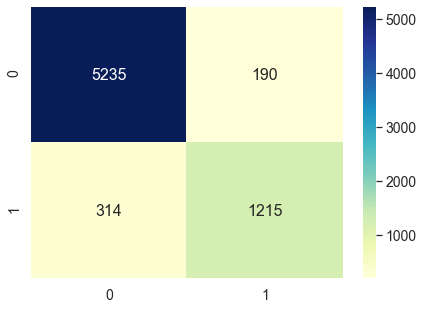

In [97]:
rf_cm = pd.DataFrame(rf_cm, index=[i for i in '01'], columns=[i for i in '01'])
plt.figure(figsize = (7,5))
sns.heatmap(rf_cm,annot=True, annot_kws={"size": 16},cmap="YlGnBu",fmt='g');

**Logistic Regression**

In [99]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
lg_clf.fit(X_train,y_train)

LogisticRegression()

In [100]:
lg_mean_cv_score = cross_val_score(lg_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

In [101]:
lg_y_pred = lg_clf.predict(X_test)

lg_cm = confusion_matrix(y_test, lg_y_pred)
lg_cm

lg_acc = accuracy_score(y_test, lg_y_pred)
lg_recall = recall_score(y_test, lg_y_pred)
lg_spec = specificity(lg_cm)
lg_f1 = f1_score(y_test, lg_y_pred)

lg_fpr, lg_tpr, thresholds = roc_curve(y_test, lg_y_pred, pos_label=1)
lg_auc = auc(lg_fpr, lg_tpr)

array([[5117,  308],
       [ 318, 1211]], dtype=int64)

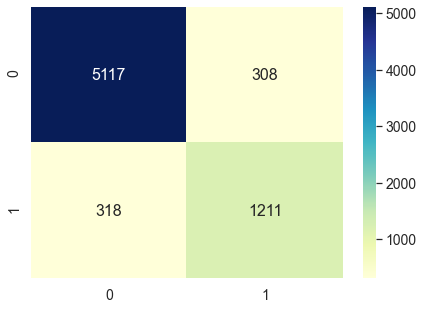

In [102]:
lg_cm = pd.DataFrame(lg_cm, index=[i for i in '01'], columns=[i for i in '01'])
plt.figure(figsize = (7,5))
sns.heatmap(lg_cm,annot=True, annot_kws={"size": 16},cmap="YlGnBu",fmt='g');

**K-Nearest Neighbors model**

In [103]:
# K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [104]:
knn_mean_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy").mean()
knn_y_pred = knn_clf.predict(X_test)

knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm

knn_acc = accuracy_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_spec = specificity(knn_cm)
knn_f1 =f1_score(y_test, knn_y_pred)

knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_y_pred, pos_label=1)
knn_auc = auc(knn_fpr, knn_tpr)

array([[4569,  856],
       [ 300, 1229]], dtype=int64)

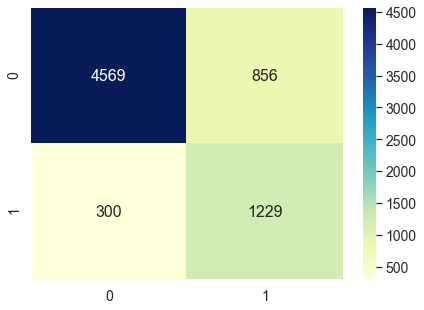

In [105]:
knn_cm = pd.DataFrame(knn_cm, index=[i for i in '01'], columns=[i for i in '01'])
plt.figure(figsize = (7,5))
sns.heatmap(knn_cm,annot=True, annot_kws={"size": 16},cmap="YlGnBu",fmt='g');

In [106]:
# The accuracy for each model
from pandas import Series, DataFrame

score = {'Cv_score' :[dt_mean_cv_score,rf_mean_cv_score,knn_mean_cv_score,lg_mean_cv_score],
                'Accuracy':[dt_acc,rf_acc,knn_acc,lg_acc],
                'Recall':[dt_recall,rf_recall,knn_recall,lg_recall],
                'Specificity':[dt_spec,rf_spec,knn_spec,lg_spec,],
                'F1':[dt_f1,rf_f1,knn_f1,lg_f1],
                'Roc-auc':[dt_auc,rf_auc,knn_auc,lg_auc]}

DataFrame(score,index=['Decision Tree','Random Forest','Knn','LogisticRegression'])

,Cv_score,Accuracy,Recall,Specificity,F1,Roc-auc
Decision Tree,0.899035,0.884095,0.804447,0.906544,0.753215,0.855496
Random Forest,0.937066,0.927524,0.794637,0.964977,0.828221,0.879807
Knn,0.935529,0.833765,0.803793,0.842212,0.680133,0.823003
LogisticRegression,0.867767,0.909980,0.792021,0.943226,0.794619,0.867623


In [107]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1],
             [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate(Recall)', fontsize=15)

plt.figure(figsize=(5,5))
plt.show();

<Figure size 360x360 with 0 Axes>

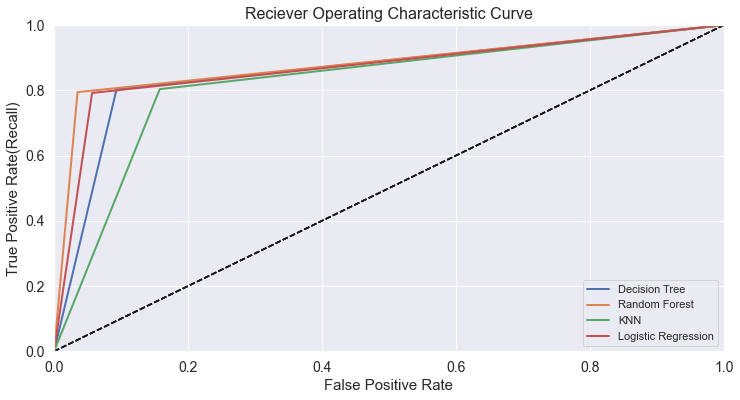

In [108]:
# plot roc curves
plot_roc_curve(dt_fpr, dt_tpr, label="Decision Tree")
plot_roc_curve(rf_fpr, rf_tpr, label="Random Forest")
plot_roc_curve(knn_fpr, knn_tpr, label="KNN")
plot_roc_curve(lg_fpr, lg_tpr, label="Logistic Regression")
plt.title("Reciever Operating Characteristic Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show();

### Fine-tune

In [109]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = range(10,100,5)
max_depth = range(10,120,5) # maximum depth decision tree
max_features = ['sqrt', 'log2'] # the number of features to consider when looking for the best split
min_samples_split = range(5,10,2) # the minimum number of samples required to split an internal node:
min_samples_leaf= range(2,8,2) # the minimum number of samples required to be at a leaf node

para_grid =  dict(n_estimators=n_estimators,
                  max_depth=max_depth, 
                  max_features=max_features,
                  min_samples_split=min_samples_split,
                  min_samples_leaf=min_samples_leaf)


trf_model = RandomizedSearchCV(rf_clf, param_distributions=para_grid,n_iter=100, cv=5, random_state=7)


In [110]:
trf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=100,
                                                    max_features='sqrt',
                                                    n_estimators=80),
                   n_iter=100,
                   param_distributions={'max_depth': range(10, 120, 5),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': range(2, 8, 2),
                                        'min_samples_split': range(5, 10, 2),
                                        'n_estimators': range(10, 100, 5)},
                   random_state=7)

In [111]:
#rds_model.cv_results_
trf_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 45}

In [112]:
y_pred = trf_model.predict(X_test)

cv_score = cross_val_score(trf_model, X_train, y_train, cv=3, scoring="accuracy").mean()
print("cv_score:",cv_score)

print("accuracy:",accuracy_score(y_test, y_pred))

print("recall:",recall_score(y_test, y_pred))
print("f1:",f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("specificity",specificity(cm) )

fpr,tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("auc:",auc(fpr,tpr))

cv_score: 0.9230461784418619
accuracy: 0.9315501869427667
recall: 0.8103335513407456
f1: 0.8388625592417062
specificity 0.9657142857142857
auc: 0.8880239185275156


In [119]:
trf_clf = RandomForestClassifier(max_depth=45,n_estimators=50,max_features='sqrt',min_samples_leaf= 2)
trf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=45, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=50)

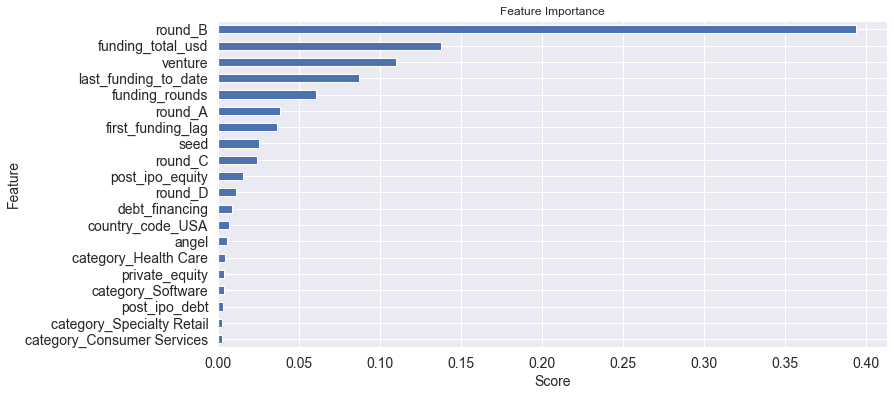

In [120]:
# plot the importance of features
feat_importances = pd.Series(trf_clf.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(20).plot(kind='barh')
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show();